In [2]:
##########################################
#                                        #
# Resolution sac a doc Cabrel            #
#
# ###################################### #
# ###################################### # 


########################## Apres analyse  de la fonction et sujet generer je juge pas tres satisfaissant ###########
########################## son code creait les sujets généré au niveau de la racine pas tres propre pour le clean code ##########

import json
import random

# Charger le jeu de données
with open('data_modified_final.json', 'r') as file:
    data = json.load(file)

questions = data['questions']

# Fonction pour vérifier la validité d'un sujet
def est_valide(sujet, max_points, max_duration, difficulty_distribution):
    points = sum([q['marks'] for q in sujet])
    duration = sum([int(q['duree_reponse'].split()[0]) for q in sujet])
    
    difficulty_counts = [0, 0, 0]
    for q in sujet:
        difficulty_counts[q['difficulte'] - 1] += 1

    return (points <= max_points and 
            duration <= max_duration and 
            all(difficulty_counts[i] <= difficulty_distribution[i] for i in range(3)))

# Fonction pour générer des sujets en utilisant une approche de sac à dos
def generer_sujets(questions, n_sujets, max_points, max_duration, difficulty_distribution):
    sujets = []

    for _ in range(n_sujets):
        sujet = []
        tentative = 0
        while (not est_valide(sujet, max_points, max_duration, difficulty_distribution) or len(sujet) == 0) and tentative < 1000:
            random.shuffle(questions)
            sujet = []
            total_points = 0
            total_duration = 0
            difficulty_counts = [0, 0, 0]
            
            for q in questions:
                points = total_points + q['marks']
                duration = total_duration + int(q['duree_reponse'].split()[0])
                difficulty_counts[q['difficulte'] - 1] += 1
                
                if points <= max_points and duration <= max_duration and all(difficulty_counts[i] <= difficulty_distribution[i] for i in range(3)):
                    sujet.append(q)
                    total_points = points
                    total_duration = duration
                
                if total_points == max_points and total_duration == max_duration:
                    break
            tentative += 1
        sujets.append(sujet)
    
    return sujets

# Spécifier les paramètres
n_sujets = 4
max_points = 20
max_duration = 45
difficulty_distribution = [30, 50, 20]

# Générer les sujets
sujets_generes = generer_sujets(questions, n_sujets, max_points, max_duration, difficulty_distribution)

# Sauvegarder les sujets générés dans des fichiers texte
for i, sujet in enumerate(sujets_generes):
    with open(f'sujet_{i+1}.txt', 'w') as file:
        for question in sujet:
            options = ' '.join(question['options'])
            file.write(f"{question['question']}, {options}, {question['marks']}, {question['duree_reponse']}, {question['difficulte']}\n")

print("Sujets générés et sauvegardés avec succès.")


Sujets générés et sauvegardés avec succès.


In [13]:
############################### Mais le formatage n'est pas bon difficiel pour commnuniquer au format .xml ##############
import os
import json
import random

# Charger le jeu de données
with open('data_modified_final.json', 'r') as file:
    data = json.load(file)

questions = data['questions']

# Fonction pour vérifier la validité d'un sujet
def est_valide(sujet, max_points, max_duration, difficulty_distribution):
    points = sum([q['marks'] for q in sujet])
    duration = sum([int(q['duree_reponse'].split()[0]) for q in sujet])

    difficulty_counts = [0, 0, 0]
    for q in sujet:
        difficulty_counts[q['difficulte'] - 1] += 1

    return (points <= max_points and 
            duration <= max_duration and 
            all(difficulty_counts[i] <= difficulty_distribution[i] for i in range(3)))

# Fonction pour générer des sujets en utilisant une approche de sac à dos
def generer_sujets(questions, n_sujets, max_points, max_duration, difficulty_distribution):
    sujets = []

    for _ in range(n_sujets):
        sujet = []
        tentative = 0
        while (not est_valide(sujet, max_points, max_duration, difficulty_distribution) or len(sujet) == 0) and tentative < 1000:
            random.shuffle(questions)
            sujet = []
            total_points = 0
            total_duration = 0
            difficulty_counts = [0, 0, 0]

            for q in questions:
                points = total_points + q['marks']
                duration = total_duration + int(q['duree_reponse'].split()[0])
                difficulty_counts[q['difficulte'] - 1] += 1

                if points <= max_points and duration <= max_duration and all(difficulty_counts[i] <= difficulty_distribution[i] for i in range(3)):
                    sujet.append(q)
                    total_points = points
                    total_duration = duration

                if total_points == max_points and total_duration == max_duration:
                    break
            tentative += 1
        sujets.append(sujet)

    return sujets

# Spécifier les paramètres
n_sujets = 4
max_points = 20
max_duration = 45
difficulty_distribution = [30, 50, 20]

# Générer les sujets
sujets_generes = generer_sujets(questions, n_sujets, max_points, max_duration, difficulty_distribution)

# Créer un dossier pour les sujets générés s'il n'existe pas
output_folder = 'sujets_generes'
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Sauvegarder les sujets générés dans des fichiers texte
for i, sujet in enumerate(sujets_generes):
    with open(os.path.join(output_folder, f'sujet_{i+1}.txt'), 'w') as file:
        for question in sujet:
            options = ' '.join(question['options'])
            file.write(f"{question['question']}, {options}, {question['marks']} points, {question['duree_reponse']} minutes, difficulté {question['difficulte']}\n")

print("Sujets générés et sauvegardés avec succès dans le dossier 'sujets_generes'.")


Sujets générés et sauvegardés avec succès dans le dossier 'sujets_generes'.


In [48]:
################################################################
# ###### FINAL TIENT COMPTE ####################################
######## RGROUPE LES REPONSE, ET GERE L'ENCODAGE ###############


import os
import json
import random

# Charger le jeu de données
with open('data_modified_final.json', 'r', encoding='utf-8') as file:
    data = json.load(file)

questions = data['questions']

# Fonction pour vérifier la validité d'un sujet
def est_valide(sujet, max_points, max_duration, difficulty_distribution):
    points = sum([q['marks'] for q in sujet])
    duration = sum([int(q['duree_reponse'].split()[0]) for q in sujet])

    difficulty_counts = [0, 0, 0]
    for q in sujet:
        difficulty_counts[q['difficulte'] - 1] += 1

    return (points <= max_points and 
            duration <= max_duration and 
            all(difficulty_counts[i] <= difficulty_distribution[i] for i in range(3)))

# Fonction pour générer des sujets en utilisant une approche de sac à dos
def generer_sujets(questions, n_sujets, max_points, max_duration, difficulty_distribution):
    sujets = []

    for _ in range(n_sujets):
        sujet = []
        tentative = 0
        while (not est_valide(sujet, max_points, max_duration, difficulty_distribution) or len(sujet) == 0) and tentative < 1000:
            random.shuffle(questions)
            sujet = []
            total_points = 0
            total_duration = 0
            difficulty_counts = [0, 0, 0]

            for q in questions:
                points = total_points + q['marks']
                duration = total_duration + int(q['duree_reponse'].split()[0])
                difficulty_counts[q['difficulte'] - 1] += 1

                if points <= max_points and duration <= max_duration and all(difficulty_counts[i] <= difficulty_distribution[i] for i in range(3)):
                    sujet.append(q)
                    total_points = points
                    total_duration = duration

                if total_points == max_points and total_duration == max_duration:
                    break
            tentative += 1
        sujets.append(sujet)

    return sujets

# Spécifier les paramètres
n_sujets = 4
max_points = 20
max_duration = 45
difficulty_distribution = [30, 50, 20]

# Générer les sujets
sujets_generes = generer_sujets(questions, n_sujets, max_points, max_duration, difficulty_distribution)

# Créer un dossier pour les sujets générés s'il n'existe pas
output_folder = 'sujets_generes'
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Sauvegarder les sujets générés dans des fichiers texte
for i, sujet in enumerate(sujets_generes):
    with open(os.path.join(output_folder, f'sujet_{i+1}.txt'), 'w', encoding='utf-8') as file:
        for question in sujet:
            options = '[' + ', '.join(question['options']) + ']'
            encoded_line = f"{question['question']}, {options}, Réponse : {question['answer']}, {question['marks']} points, {question['duree_reponse']} minutes, difficulté {question['difficulte']}\n"
            file.write(encoded_line.encode('utf-8').decode('utf-8'))

print("Sujets générés et sauvegardés avec succès dans le dossier 'sujets_generes'.")


Sujets générés et sauvegardés avec succès dans le dossier 'sujets_generes'.


In [5]:
##################################### Begin cote machine learning : creation du dataset sans virgule donc chiffre entier ###############

In [7]:
#################################### dataset moins varier et moin relaiste car validete un peu strict il faut introduire les virgule ######

import csv
import random

# Fonction pour déterminer si un sujet est valide ou non
def est_valide(total_points, total_duration, difficulty_counts, max_points, max_duration, difficulty_distribution):
    return (
        total_points <= max_points and
        total_duration <= max_duration and
        all(difficulty_counts[i] <= difficulty_distribution[i] for i in range(3))
    )

# Fonction pour générer un dataset CSV de sujets fictifs
def creer_dataset(n_echantillons, max_points, max_duration, difficulty_distribution, filename):
    with open(filename, 'w', newline='') as csvfile:
        fieldnames = ['total_points', 'total_duration', 'difficulty_1', 'difficulty_2', 'difficulty_3', 'valid']
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        
        writer.writeheader()
        
        for _ in range(n_echantillons):
            # Générer des valeurs aléatoires pour les caractéristiques
            total_points = random.randint(0, max_points + 10)
            total_duration = random.randint(0, max_duration + 10)
            difficulty_1 = random.randint(0, difficulty_distribution[0] + 10)
            difficulty_2 = random.randint(0, difficulty_distribution[1] + 10)
            difficulty_3 = random.randint(0, difficulty_distribution[2] + 10)
            
            difficulty_counts = [difficulty_1, difficulty_2, difficulty_3]
            
            # Déterminer si le sujet est valide ou non
            valid = est_valide(total_points, total_duration, difficulty_counts, max_points, max_duration, difficulty_distribution)
            
            writer.writerow({
                'total_points': total_points,
                'total_duration': total_duration,
                'difficulty_1': difficulty_counts[0],
                'difficulty_2': difficulty_counts[1],
                'difficulty_3': difficulty_counts[2],
                'valid': int(valid)
            })

# Spécifier les paramètres
n_echantillons = 10000  # Nombre d'échantillons à générer
max_points = 20
max_duration = 45
difficulty_distribution = [30, 50, 20]

# Créer le dataset
creer_dataset(n_echantillons, max_points, max_duration, difficulty_distribution, 'dataset.csv')

print("Dataset généré et sauvegardé avec succès.")


Dataset généré et sauvegardé avec succès.


In [ ]:
##################################### Begin cote machine learning : creation DATASET FINAL ###############

In [ ]:
""""
Pour obtenir un dataset plus réaliste et permettre une validation moins stricte, 
nous pouvons introduire une certaine tolérance dans les critères de validation. 
En incluant des valeurs décimales et en autorisant des variations autour des points, 
de la durée et des niveaux de difficulté, nous pouvons générer un dataset plus varié et réaliste.

""""
"""""Explication des Modifications
Tolérance : J'ai ajouté un paramètre de tolérance (tolerance=0.1), ce qui signifie que les sujets peuvent dépasser les limites de 10% tout en étant considérés comme valides. 
Cela introduit une certaine flexibilité dans les critères de validation.

Valeurs Décimales : Les points, la durée et les niveaux de difficulté sont générés avec des valeurs décimales (random.uniform) pour refléter des variations plus fines et réalistes.

Nombre d'Échantillons : Le nombre d'échantillons générés a été augmenté à 1 000 000 pour obtenir un dataset suffisamment large pour entraîner un modèle de machine learning.
"""

"""""
Justification

Tolérance : En incluant une tolérance de 10%, nous permettons une certaine marge d'erreur, ce qui est plus réaliste et évite une validation trop stricte.
Valeurs Décimales : L'utilisation de valeurs décimales permet de capturer des variations plus subtiles dans les caractéristiques des sujets, ce qui peut améliorer la performance du modèle de machine learning.
Volume de Données : Un grand nombre d'échantillons (1 000 000) assure une diversité suffisante pour entraîner un modèle de machine learning de manière efficace.
Cette approche permet de créer un dataset réaliste et varié, tout en conservant des critères de validation souples pour mieux entraîner un modèle de machine learning.

"""

In [8]:
import csv
import random

# Fonction pour déterminer si un sujet est valide ou non avec une tolérance
def est_valide(total_points, total_duration, difficulty_counts, max_points, max_duration, difficulty_distribution, tolerance=0.1):
    return (
        total_points <= max_points * (1 + tolerance) and
        total_duration <= max_duration * (1 + tolerance) and
        all(difficulty_counts[i] <= difficulty_distribution[i] * (1 + tolerance) for i in range(3))
    )

# Fonction pour générer un dataset CSV de sujets fictifs
def creer_dataset(n_echantillons, max_points, max_duration, difficulty_distribution, filename):
    with open(filename, 'w', newline='') as csvfile:
        fieldnames = ['total_points', 'total_duration', 'difficulty_1', 'difficulty_2', 'difficulty_3', 'valid']
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        
        writer.writeheader()
        
        for _ in range(n_echantillons):
            # Générer des valeurs aléatoires pour les caractéristiques
            total_points = random.uniform(0, max_points + 5)
            total_duration = random.uniform(0, max_duration + 10)
            difficulty_1 = random.uniform(0, difficulty_distribution[0] + 5)
            difficulty_2 = random.uniform(0, difficulty_distribution[1] + 10)
            difficulty_3 = random.uniform(0, difficulty_distribution[2] + 5)
            
            difficulty_counts = [difficulty_1, difficulty_2, difficulty_3]
            
            # Déterminer si le sujet est valide ou non avec une tolérance
            valid = est_valide(total_points, total_duration, difficulty_counts, max_points, max_duration, difficulty_distribution)
            
            writer.writerow({
                'total_points': total_points,
                'total_duration': total_duration,
                'difficulty_1': difficulty_counts[0],
                'difficulty_2': difficulty_counts[1],
                'difficulty_3': difficulty_counts[2],
                'valid': int(valid)
            })

# Spécifier les paramètres
n_echantillons = 1000000  # Nombre d'échantillons à générer
max_points = 20
max_duration = 45
difficulty_distribution = [30, 50, 20]

# Créer le dataset
creer_dataset(n_echantillons, max_points, max_duration, difficulty_distribution, 'dataset_final.csv')

print("Dataset généré et sauvegardé avec succès.")


Dataset généré et sauvegardé avec succès.


In [ ]:
####################################### Creation de Decision Tree : DT  : si le jeu de donne est toujour trop stric on aurai une precesiion de 100 ###########

Scores de validation croisée : [0.99999  1.       1.       1.       0.999995]
Moyenne des scores de validation croisée : 0.9999969999999999
Accuracy du modèle sur l'ensemble de test : 1.00


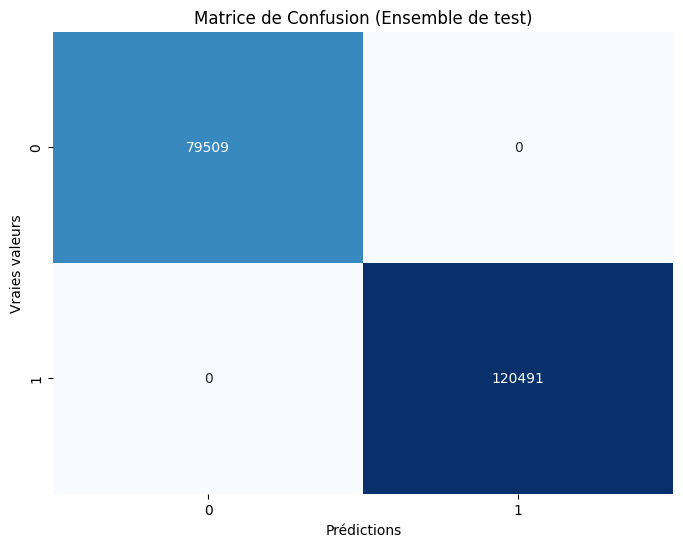

Le sujet est valide.


In [28]:
########################## Decision Tree 1  : Test sur un exemeple d'information d'un sujet avec validation croisée et affichage de la matrice de confusion pour visualiser les classifcation en focntion de chaque classe #######################################
######################### Entrainement sur le Dataset Strict il faut varier les jeu de donnee pour bien comprendre de quoi et comme la cross validation fonctionne ################################
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Charger le dataset à partir du fichier CSV
#dataset = pd.read_csv('dataset.csv') #Entrainement sur le Dataset Strict
dataset = pd.read_csv('dataset_final.csv') #Entrainement sur le Dataset plus realiste



# Diviser le dataset en features (X) et la classe cible (y)
X = dataset[['total_points', 'total_duration', 'difficulty_1', 'difficulty_2', 'difficulty_3']]
y = dataset['valid']

# Initialiser le modèle d'arbre de décision
model = DecisionTreeClassifier(random_state=42)

# Effectuer une validation croisée (cross-validation)
cv_scores = cross_val_score(model, X, y, cv=5)  # Utilisation de 5 folds pour la cross-validation

# Afficher les scores de validation croisée
print("Scores de validation croisée :", cv_scores)
print("Moyenne des scores de validation croisée :", cv_scores.mean())

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entraîner le modèle sur l'ensemble d'entraînement
model.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

# Calculer l'accuracy du modèle sur l'ensemble de test
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy du modèle sur l'ensemble de test : {accuracy:.2f}")

# Afficher la matrice de confusion pour l'ensemble de test
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Prédictions')
plt.ylabel('Vraies valeurs')
plt.title('Matrice de Confusion (Ensemble de test)')
plt.show()

# Exemple d'utilisation pour valider un sujet généré
sujet = {
    'total_points': 18.5,
    'total_duration': 42.8,
    'difficulty_1': 28.7,
    'difficulty_2': 45.2,
    'difficulty_3': 18.8
}

# Transformer le sujet en format attendu par le modèle
sujet_df = pd.DataFrame([sujet])

# Faire la prédiction avec le modèle entraîné sur l'ensemble d'entraînement
prediction = model.predict(sujet_df)[0]

# Afficher le résultat de validation
if prediction == 1:
    print("Le sujet est valide.")
else:
    print("Le sujet n'est pas valide.")



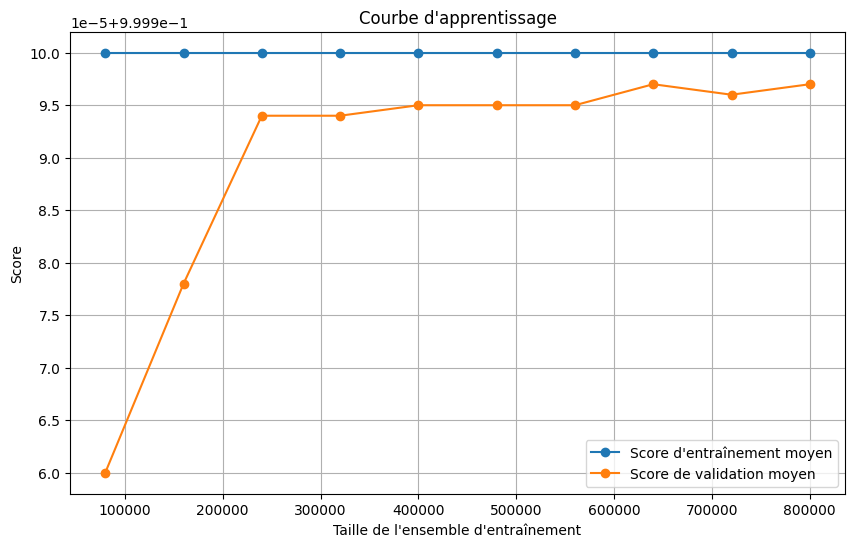

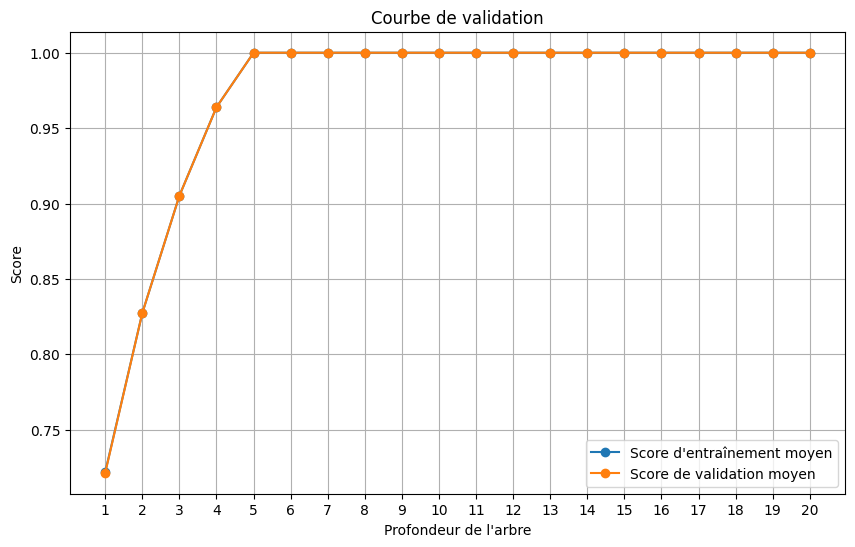

Accuracy du modèle : 1.00


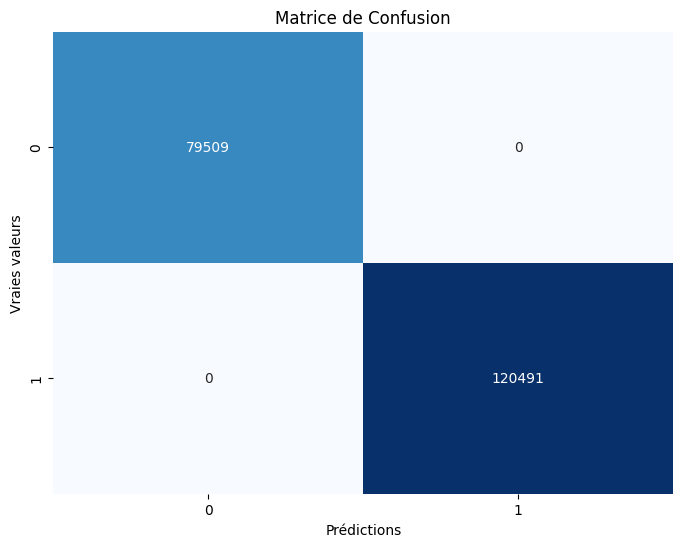

In [29]:
############################ AVEC COURBE POUR VISUALISER TOUTES LES METRIQUES DU DECISON TREE : DT #####################
############################ lE JEU DE DONNEE EST TROP STRICT DOU UN 100 COMME PRECEISON DONC L'ARBRE PARVIENDRA TOUJOUR A DIFFRENCEIER UN BON SUJET DUN MAUVAIS ############ ET DANS LE PIRE DES CAS ON PEUT TOMBER EN OVERFIITING
########################### Ici On se base sur une seul metrique pour un debut qui est la precision de classification ou de differnciation de classe par le DT #####################

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, learning_curve, validation_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Charger le dataset à partir du fichier CSV
#dataset = pd.read_csv('dataset.csv') #Entrainement sur le Dataset Strict
dataset = pd.read_csv('dataset_final.csv') #Entrainement sur le Dataset plus realiste


# Diviser le dataset en features (X) et la classe cible (y)
X = dataset[['total_points', 'total_duration', 'difficulty_1', 'difficulty_2', 'difficulty_3']]
y = dataset['valid']

# Définir les valeurs pour les courbes d'apprentissage et de validation
train_sizes = np.linspace(0.1, 1.0, 10)  # 10 tailles d'entraînement différentes de 10% à 100%

# Initialiser le modèle d'arbre de décision
model = DecisionTreeClassifier(random_state=42)

# Calculer les courbes d'apprentissage
train_sizes, train_scores, validation_scores = learning_curve(
    estimator=model,
    X=X, y=y,
    train_sizes=train_sizes,
    cv=5,  # Nombre de folds pour la validation croisée
    scoring='accuracy',  # Métrique d'évaluation
    random_state=42
)

# Calculer les moyennes des scores d'entraînement et de validation
train_scores_mean = np.mean(train_scores, axis=1)
validation_scores_mean = np.mean(validation_scores, axis=1)

# Tracer la courbe d'apprentissage
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Score d\'entraînement moyen', marker='o')
plt.plot(train_sizes, validation_scores_mean, label='Score de validation moyen', marker='o')
plt.xlabel('Taille de l\'ensemble d\'entraînement')
plt.ylabel('Score')
plt.title('Courbe d\'apprentissage')
plt.legend()
plt.grid(True)
plt.show()

# Calculer la courbe de validation pour un hyperparamètre (ici la profondeur de l'arbre)
param_range = np.arange(1, 21)
train_scores, validation_scores = validation_curve(
    estimator=model,
    X=X, y=y,
    param_name='max_depth',  # Hyperparamètre à évaluer
    param_range=param_range,
    cv=5,  # Nombre de folds pour la validation croisée
    scoring='accuracy',  # Métrique d'évaluation
    n_jobs=-1
)

# Calculer les moyennes des scores d'entraînement et de validation
train_scores_mean = np.mean(train_scores, axis=1)
validation_scores_mean = np.mean(validation_scores, axis=1)

# Tracer la courbe de validation
plt.figure(figsize=(10, 6))
plt.plot(param_range, train_scores_mean, label='Score d\'entraînement moyen', marker='o')
plt.plot(param_range, validation_scores_mean, label='Score de validation moyen', marker='o')
plt.xlabel('Profondeur de l\'arbre')
plt.ylabel('Score')
plt.title('Courbe de validation')
plt.legend()
plt.grid(True)
plt.xticks(param_range)
plt.show()

# Diviser les données en ensembles d'entraînement et de test pour la matrice de confusion
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entraîner le modèle avec les données d'entraînement
model.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

# Calculer l'accuracy du modèle
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy du modèle : {accuracy:.2f}")

# Afficher la matrice de confusion
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Prédictions')
plt.ylabel('Vraies valeurs')
plt.title('Matrice de Confusion')
plt.show()


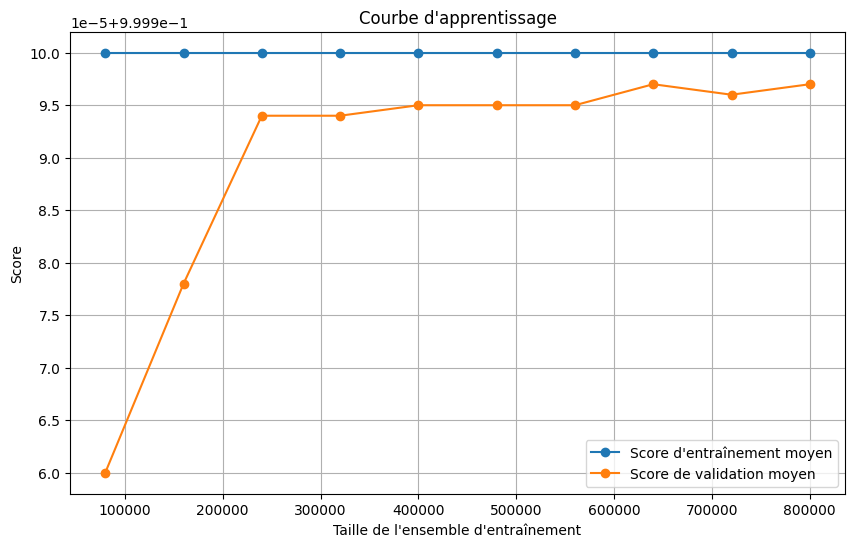

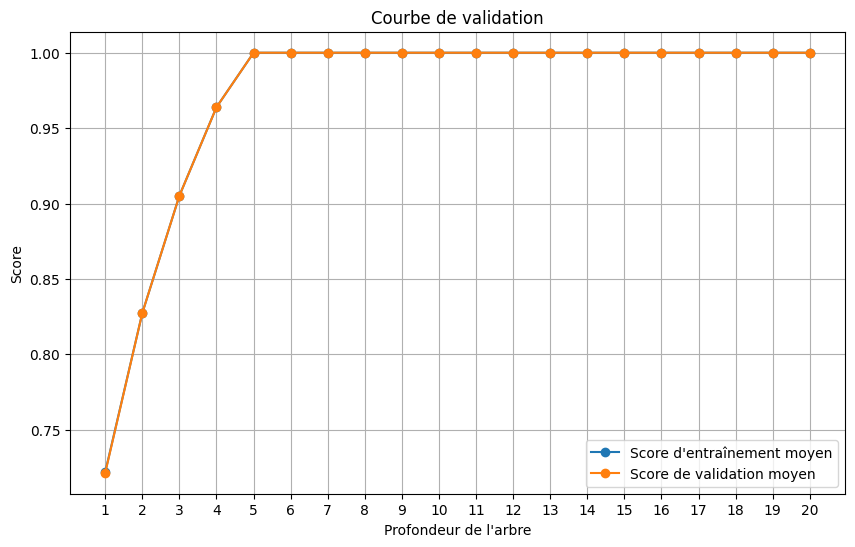

Accuracy du modèle : 1.00
Precision du modèle : 1.00
Recall du modèle : 1.00
F1-score du modèle : 1.00


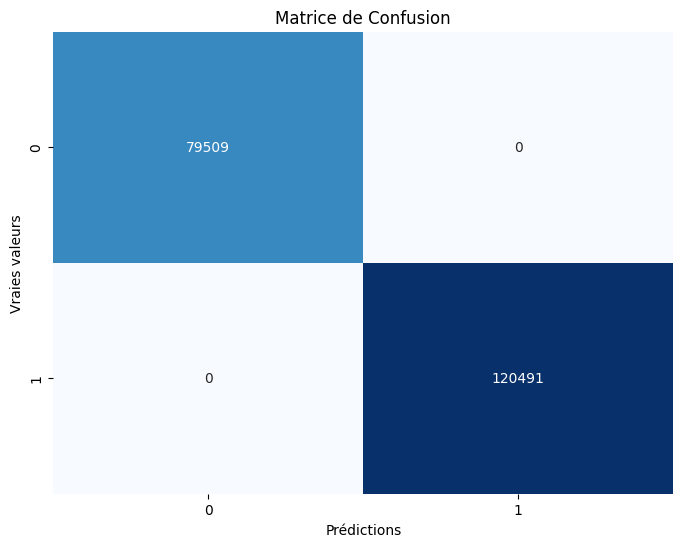

In [33]:
########################################## On utilise d'autre metrique pour evaluer notre model en dehors de a precision ceci pour se rassurer des performance de classification ###########


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, learning_curve, validation_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Charger le dataset à partir du fichier CSV
#dataset = pd.read_csv('dataset.csv') #Entrainement sur le Dataset Strict
dataset = pd.read_csv('dataset_final.csv') #Entrainement sur le Dataset plus realiste

# Diviser le dataset en features (X) et la classe cible (y)
X = dataset[['total_points', 'total_duration', 'difficulty_1', 'difficulty_2', 'difficulty_3']]
y = dataset['valid']

# Définir les valeurs pour les courbes d'apprentissage et de validation
train_sizes = np.linspace(0.1, 1.0, 10)  # 10 tailles d'entraînement différentes de 10% à 100%

# Initialiser le modèle d'arbre de décision
model = DecisionTreeClassifier(random_state=42)

# Calculer les courbes d'apprentissage
train_sizes, train_scores, validation_scores = learning_curve(
    estimator=model,
    X=X, y=y,
    train_sizes=train_sizes,
    cv=5,  # Nombre de folds pour la validation croisée
    scoring='accuracy',  # Métrique d'évaluation
    random_state=42
)

# Calculer les moyennes des scores d'entraînement et de validation
train_scores_mean = np.mean(train_scores, axis=1)
validation_scores_mean = np.mean(validation_scores, axis=1)

# Tracer la courbe d'apprentissage
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Score d\'entraînement moyen', marker='o')
plt.plot(train_sizes, validation_scores_mean, label='Score de validation moyen', marker='o')
plt.xlabel('Taille de l\'ensemble d\'entraînement')
plt.ylabel('Score')
plt.title('Courbe d\'apprentissage')
plt.legend()
plt.grid(True)
plt.show()

# Calculer la courbe de validation pour un hyperparamètre (ici la profondeur de l'arbre)
param_range = np.arange(1, 21)
train_scores, validation_scores = validation_curve(
    estimator=model,
    X=X, y=y,
    param_name='max_depth',  # Hyperparamètre à évaluer
    param_range=param_range,
    cv=5,  # Nombre de folds pour la validation croisée
    scoring='accuracy',  # Métrique d'évaluation
    n_jobs=-1
)

# Calculer les moyennes des scores d'entraînement et de validation
train_scores_mean = np.mean(train_scores, axis=1)
validation_scores_mean = np.mean(validation_scores, axis=1)

# Tracer la courbe de validation
plt.figure(figsize=(10, 6))
plt.plot(param_range, train_scores_mean, label='Score d\'entraînement moyen', marker='o')
plt.plot(param_range, validation_scores_mean, label='Score de validation moyen', marker='o')
plt.xlabel('Profondeur de l\'arbre')
plt.ylabel('Score')
plt.title('Courbe de validation')
plt.legend()
plt.grid(True)
plt.xticks(param_range)
plt.show()

# Diviser les données en ensembles d'entraînement et de test pour la matrice de confusion
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entraîner le modèle avec les données d'entraînement
model.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

# Calculer les métriques d'évaluation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy du modèle : {accuracy:.2f}")
print(f"Precision du modèle : {precision:.2f}")
print(f"Recall du modèle : {recall:.2f}")
print(f"F1-score du modèle : {f1:.2f}")

# Afficher la matrice de confusion
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Prédictions')
plt.ylabel('Vraies valeurs')
plt.title('Matrice de Confusion')
plt.show()


In [ ]:
###################################################### Maintenant il est temps de lire les sujets generer pas l'approche :SAC A DOS ET DE METTRE CELA SOUS FORME DE DATASET POUR LEURS PASSER AU DT POUR VALIDER LE SUJET OU NON #################

In [17]:
import os
import csv

# Function to read generated subjects from text files and compute metrics
def read_generated_subjects(folder_path):
    subjects_data = []

    # Iterate over each file in the folder
    for filename in os.listdir(folder_path):
        if filename.endswith('.txt'):
            subject_path = os.path.join(folder_path, filename)
            with open(subject_path, 'r') as file:
                questions = []
                total_points = 0
                total_duration = 0
                difficulty_counts = [0, 0, 0]

                for line in file:
                    # Parse each line to extract relevant information
                    parts = line.strip().split(',')
                    
                    if len(parts) < 5:
                        print(f"Issue with line in file {filename}: {line.strip()}")
                        continue
                    
                    question = parts[0].strip()
                    options = parts[1].strip()
                    
                    try:
                        # Extract marks, duration, and difficulty safely
                        marks = float(parts[-3].strip().split()[0])  # Extracting points as float
                        duration = float(parts[-2].strip().split()[0])  # Extracting duration as float
                        difficulty = int(parts[-1].strip().split()[1])  # Extracting difficulty level
                    except ValueError as e:
                        print(f"Error in file {filename}, line: {line.strip()}")
                        print(f"Error message: {e}")
                        continue

                    # Append question information to list
                    questions.append({
                        'question': question,
                        'options': options.split(),
                        'marks': marks,
                        'duration': duration,
                        'difficulty': difficulty
                    })

                    # Update total points, total duration, and difficulty counts
                    total_points += marks
                    total_duration += duration
                    difficulty_counts[difficulty - 1] += 1

                # Append metrics for the subject to subjects_data
                subjects_data.append({
                    'file': filename,
                    'total_points': total_points,
                    'total_duration': total_duration,
                    'difficulty_1': difficulty_counts[0],
                    'difficulty_2': difficulty_counts[1],
                    'difficulty_3': difficulty_counts[2]
                })

    return subjects_data

# Define the folder path where generated subjects are stored
generated_subjects_folder = 'sujets_generes'

# Read generated subjects and compute metrics
subjects_data = read_generated_subjects(generated_subjects_folder)

# Define the CSV output file path
output_csv_file = 'sujet_test.csv'

# Write computed metrics to CSV
with open(output_csv_file, 'w', newline='') as csvfile:
    fieldnames = ['file', 'total_points', 'total_duration', 'difficulty_1', 'difficulty_2', 'difficulty_3']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

    writer.writeheader()
    for subject in subjects_data:
        writer.writerow(subject)

print(f"Computed metrics saved successfully to '{output_csv_file}'.")


Computed metrics saved successfully to 'sujet_test.csv'.


In [ ]:
################################################ Validation des sujets générer pas l'approche sac a doc avec le model d'Aebre de Decision : DT ###########################

################################################ ON PEUT DIRECTEMENT  ECRIRE LE CODE XML DES SUJET VALIDE DANS CETTE SECTION VIA UNE STRUCTURE CONDITIONNELLE MASI SA SERAIT TOUFFU DONC ON VA CREER UNE CELLULE POUR CELA OU ON PAS PLUTOT ACCEDER AU FICHIER DE PREDICTIONN DES SUJETS DE TEXT POUR CONCEVOIR LEURS CODE XML POUR CHAQUE SUJET ############


In [32]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

# Charger le modèle d'arbre de décision déjà entraîné (assurez-vous qu'il est correctement initialisé)
#model = DecisionTreeClassifier(random_state=42)

# Charger le fichier CSV contenant les métriques des sujets générés
sujet_test_file = 'sujet_test.csv'
sujet_test_data = pd.read_csv(sujet_test_file)

# Sélectionner les features à utiliser pour la prédiction
X_sujets = sujet_test_data[['total_points', 'total_duration', 'difficulty_1', 'difficulty_2', 'difficulty_3']]

# Faire des prédictions avec le modèle sur les sujets générés
predictions = model.predict(X_sujets)
prediction_probabilities = model.predict_proba(X_sujets)[:, 1] * 100  # Pourcentage de probabilité de validation

# Ajouter les prédictions au DataFrame original
sujet_test_data['validation_status'] = ['valide' if pred == 1 else 'non valide' for pred in predictions]
sujet_test_data['validation_degree'] = prediction_probabilities

# Définir le chemin du fichier CSV pour sauvegarder les résultats
output_file = 'sujets_valides_predictions.csv'

# Sauvegarder les résultats avec les prédictions dans un nouveau fichier CSV
sujet_test_data.to_csv(output_file, index=False)

print(f"Prédictions sauvegardées avec succès dans '{output_file}'.")


Prédictions sauvegardées avec succès dans 'sujets_valides_predictions.csv'.


In [ ]:
######################################## Encapsulation des sujets valides au format xml : approche utilisatn les deux fichiers .csv et .txt : donc celui des prediction des sujet et celui des sujet.txt generer ###########################


In [54]:
import os
import json
import pandas as pd

# Fonction pour générer le code XML d'une question de type QCM pour Moodle

def generate_xml_question(questions, question_number, category_name):
    xml_content = f"<question type=\"category\"><category><text>{category_name}</text></category></question>\n"

    for question in questions:
        xml_content += f"  <question type=\"multichoice\">\n"
        xml_content += f"    <name>\n"
        xml_content += f"      <text>{question_number}. {question['question']}</text>\n"
        xml_content += f"    </name>\n"
        xml_content += f"    <questiontext format=\"html\">\n"
        xml_content += f"      <text><![CDATA[<pre>{question['question']}</pre>]]></text>\n"
        xml_content += f"    </questiontext>\n"
        xml_content += f"    <generalfeedback format=\"html\">\n"
        xml_content += f"      <text></text>\n"
        xml_content += f"    </generalfeedback>\n"
        xml_content += f"    <defaultgrade>1.0000000</defaultgrade>\n"
        xml_content += f"    <penalty>0.3333333</penalty>\n"
        xml_content += f"    <hidden>0</hidden>\n"
        xml_content += f"    <single>true</single>\n"
        xml_content += f"    <shuffleanswers>true</shuffleanswers>\n"
        xml_content += f"    <answernumbering>abc</answernumbering>\n"
        xml_content += f"    <correctfeedback format=\"html\">\n"
        xml_content += f"      <text>Your answer is correct.</text>\n"
        xml_content += f"    </correctfeedback>\n"
        xml_content += f"    <partiallycorrectfeedback format=\"html\">\n"
        xml_content += f"      <text>Your answer is partially correct.</text>\n"
        xml_content += f"    </partiallycorrectfeedback>\n"
        xml_content += f"    <incorrectfeedback format=\"html\">\n"
        xml_content += f"      <text>Your answer is incorrect.</text>\n"
        xml_content += f"    </incorrectfeedback>\n"
        xml_content += f"    <shownumcorrect></shownumcorrect>\n"
        xml_content += f"    <answer fraction=\"100\" format=\"html\">\n"
        xml_content += f"      <text><![CDATA[<pre>{question['correct_answer']}</pre>]]></text>\n"
        xml_content += f"      <feedback format=\"html\">\n"
        xml_content += f"        <text></text>\n"
        xml_content += f"      </feedback>\n"
        xml_content += f"    </answer>\n"

        # Boucle sur les options de réponse
        for i, option in enumerate(question['options']):
            xml_content += f"    <answer fraction=\"0\" format=\"html\">\n"
            xml_content += f"      <text><![CDATA[<pre>{option}</pre>]]></text>\n"
            xml_content += f"      <feedback format=\"html\">\n"
            xml_content += f"        <text></text>\n"
            xml_content += f"      </feedback>\n"
            xml_content += f"    </answer>\n"

        xml_content += f"  </question>\n"
        question_number += 1

    return xml_content



# Chemin vers le dossier contenant les sujets générés
input_folder = 'sujets_generes'

# Dossier où seront sauvegardés les fichiers XML des sujets valides
output_folder = 'sujets_valides_xml'
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Lecture du fichier de prédictions
predictions_file = 'sujets_valides_predictions.csv'
predictions_data = pd.read_csv(predictions_file)

# Parcourir chaque sujet validé et générer le XML correspondant
for index, row in predictions_data.iterrows():
    if row['validation_status'] == 'valide':
        # Lire le fichier texte correspondant au sujet validé
        txt_filename = os.path.join(input_folder, f'sujet_{index + 1}.txt')

        # Lire et traiter les questions du sujet depuis le fichier texte
        with open(txt_filename, 'r', encoding='utf-8', errors='ignore') as file:
            lines = file.readlines()

        # Structurez le sujet à partir des lignes lues (à adapter selon votre format de texte)
        generated_questions = []
        for line in lines:
            parts = line.split(',')  # Adapté au format de votre fichier

            # Assurez-vous que la ligne contient suffisamment de parties pour éviter IndexError
            if len(parts) >= 6:
                question_text = parts[0].strip()
                options = [opt.strip() for opt in parts[1:-4]]  # Récupère toutes les options
                correct_answer = parts[-4].split(':')[0].strip()
                marks = int(parts[-3].split()[0])
                response_duration = int(parts[-2].split()[0])
                difficulty_level = int(parts[-1].strip().split()[-1])

                # Créez un dictionnaire représentant chaque question
                question = {
                    'question': question_text,
                    'options': options,
                    'correct_answer': correct_answer,
                    'marks': marks,
                    'response_duration': response_duration,
                    'difficulty_level': difficulty_level
                }

                generated_questions.append(question)
            else:
                print(f"Erreur de format dans la ligne : {line}")

        # Générer le XML pour le sujet et l'écrire dans un fichier
        xml_content = generate_xml_question(generated_questions, index + 1, "sujet")
        xml_filename = os.path.join(output_folder, f'sujet_{index + 1}.xml')
        with open(xml_filename, 'w', encoding='utf-8') as xml_file:
            xml_file.write(xml_content)

print(f"Fichiers XML des sujets valides générés avec succès dans '{output_folder}'.")


Fichiers XML des sujets valides générés avec succès dans 'sujets_valides_xml'.


In [ ]:
"""""Ce trvail peut etre ameliorer en changeant les ponderation et les difficulté et autre dans la fonction qui complete le dataset a on aurria les ponderation et autres parametres avec les virgule ce qui va reduire les resulat de classification 
de meme en  en executant n- fois la fonction de creation de dataset_final.csv qui creait un million d'echantillon et incluant une marge consistante cela devrai reduire le overfitting car  il serai plus realiste..."""